<a href="https://colab.research.google.com/github/mitsouma/spam-email-classifier./blob/main/spam_email_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Importing the Libraries & Loading data </span></b>

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk #Natural Language Toolkit
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
#Load data & print samples
df = pd.read_csv('/kaggle/input/email-spam-detection-dataset-classification/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Let's drop the non-relevant unnamed columns
df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)

# Renaming v1 & v2 as Category & Text
df=df.rename(columns={"v1":"Category","v2":"Text"})

#Sample post modifications
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Exploratory Data Analysis</span></b>

In [ ]:
#Let's check the length of the dataset
print(" Total number of rows in the dataset are", len(df))

 Total number of rows in the dataset are 5572


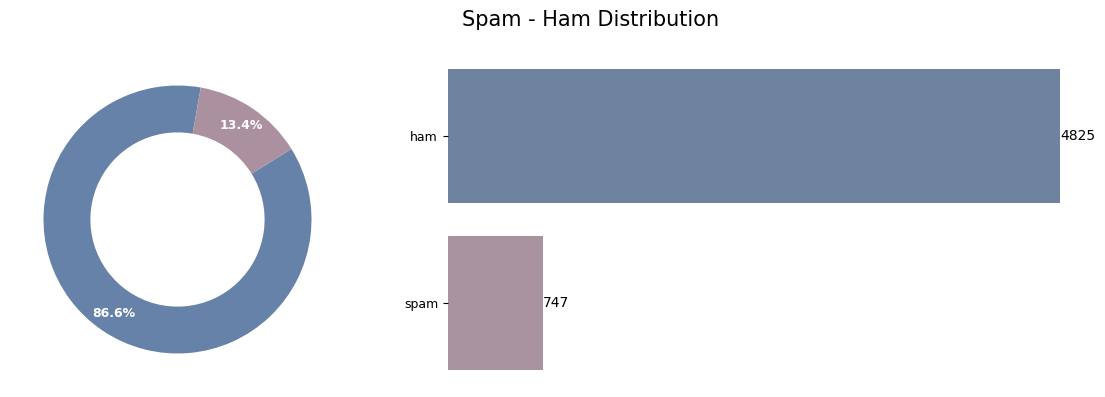

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax = ax.flatten()
value_counts = df['Category'].value_counts()
labels = value_counts.index.tolist()
colors =["#6782a8", "#ab90a0" ]
# Donut Chart
wedges, texts, autotexts = ax[0].pie(
    value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
    wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
# circle
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax[0].add_artist(centre_circle)

# Count Plot
sns.countplot(data=df, y=df['Category'], ax=ax[1], palette=colors, order=labels)
for i, v in enumerate(value_counts):
    ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
sns.despine(left=True, bottom=True)
plt.yticks(fontsize=9,color='black')
ax[1].set_ylabel(None)
plt.xlabel("")
plt.xticks([])
fig.suptitle('Spam - Ham Distribution', fontsize=15)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [ ]:
#Descriptive Summary of the dataset
df.describe()

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
    
- The dataset has **4825 emails (86.6%)** labled as Ham while **747 (13.4%)** labaled as Spam.
- "ham" is the predominant category.
- The dataset contains 5,169 unique texts.
- The most frequent text being "Sorry, I'll call later," occurring 30 times.

In [ ]:
#Let's create a column to check of each text & plot a histogram to check the distirbution
df['Length']=df['Text'].apply(len)
display(df.head())

#distribution of the data
import plotly.express as px
fig = px.histogram(df, x='Length', marginal='rug',
                   title='Histogram of Text Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

,Category,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#Lets check the distribution against categories
import plotly.express as px
fig = px.histogram(df, x='Length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [ ]:
#Let's Label the data as 0 & 1 i.e. Spam as 1 & Ham as 0
df.loc[:,'Category']=df.Category.map({'ham':0, 'spam':1})
df['Category'] = df['Category'].astype(int)
df.head()

,Category,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
! pip install wordcloud

## <b><span style='color:#28838a'> </span><span style='color:#fc7651'> Word Cloud : Spam vs Ham </span></b>

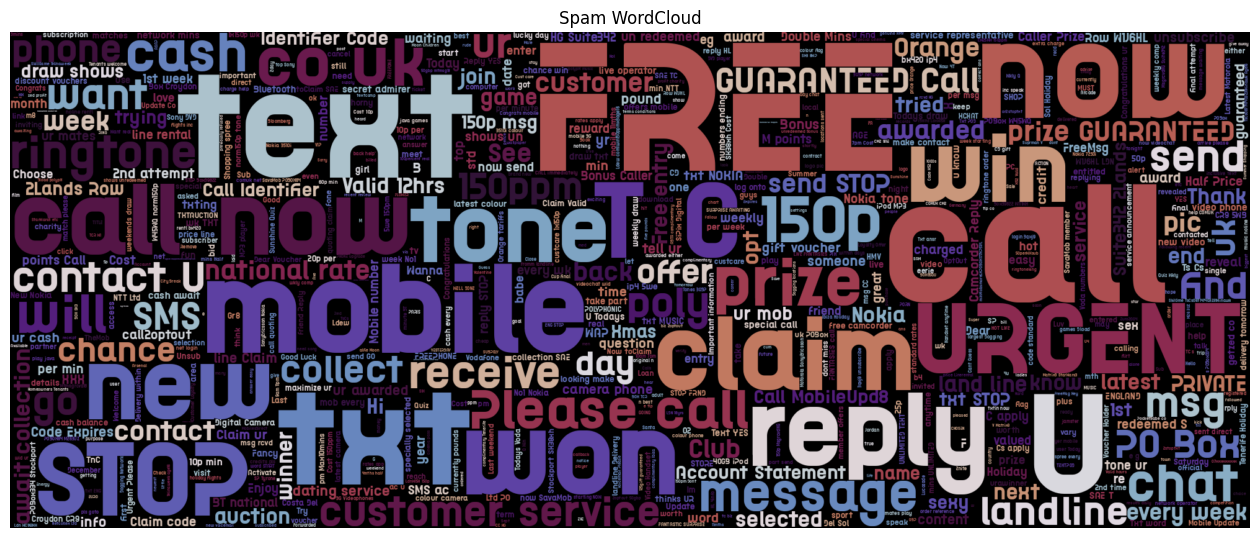

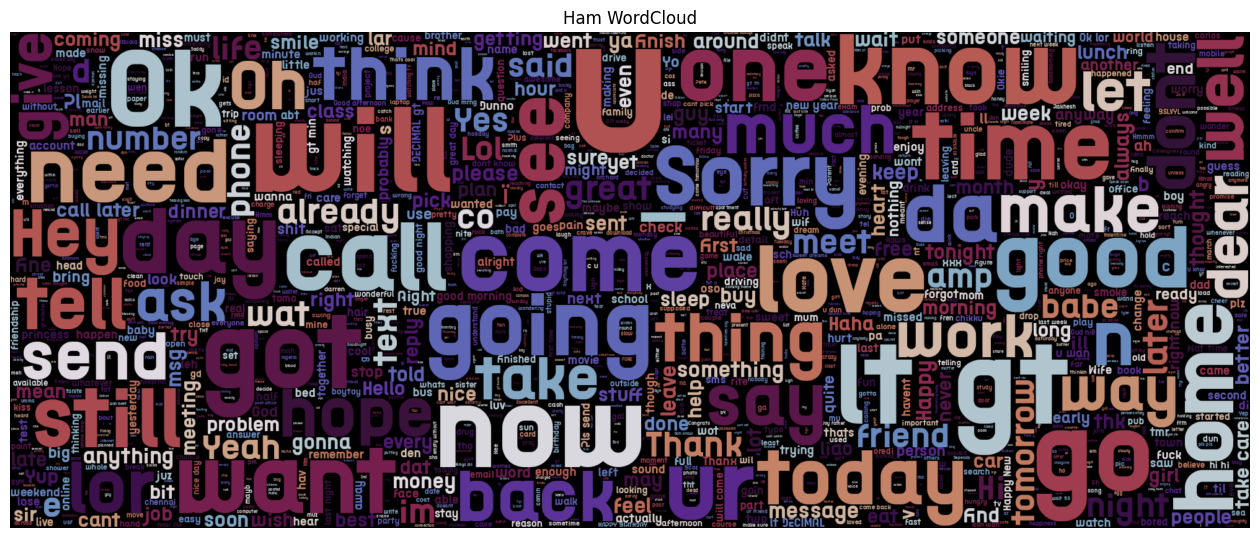

In [ ]:
from wordcloud import WordCloud, STOPWORDS
spam = df[df['Category'] == 1]
ham = df[df['Category'] == 0]
font_path = "/kaggle/input/fonts/acetone_font.otf"

# function to generate and display a WordCloud
def generate_wordcloud(data, title):
    words = ' '.join(data['Text'])
    wordcloud = WordCloud(stopwords=STOPWORDS, font_path=font_path,
                          max_words=1500,
                          max_font_size=350, random_state=42,
                          width=2000, height=800,
                          colormap="twilight").generate(words)
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# WordClouds for Spam and Ham
generate_wordcloud(spam, 'Spam WordCloud')
generate_wordcloud(ham, 'Ham WordCloud')

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:150%; text-align:left">  5 ways to identify a Spam email
    
<center><img src='https://www.skyward.com/web/media/Images/Blogs/AK12/2023/October/BannersCards/Phishing.gif'
     height=300px width=800px /></center>


## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Bag of Words </span></b>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['Text'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.30, random_state=100)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [ ]:
#Let's print the dimentions of the train & test dataset
display('X-Train :', x_train.shape)
display('X-Test :',x_test.shape)
display('Y-Train :',y_train.shape)
display('X-Test :',y_test.shape)

'X-Train :'

(3900, 8672)

'X-Test :'

(1672, 8672)

'Y-Train :'

(3900,)

'X-Test :'

(1672,)

## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Training the ML models </span></b>

### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Neural Network </span></b>

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_classifier_model.fit(x_train, y_train)

prediction = mlp_classifier_model.predict(x_test)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction)))


MLP Classifier
Accuracy score: 0.98
Precision score: 0.97
Recall score: 0.90
F1 score: 0.94
CPU times: user 8.53 s, sys: 13.5 s, total: 22 s
Wall time: 5.83 s


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Multinomial Naive Bayes </span></b>

In [ ]:
%%time
# Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9814593301435407
Precision score: 0.9174311926605505
Recall score: 0.9389671361502347
F1 score: 0.9280742459396751
CPU times: user 17.6 ms, sys: 211 µs, total: 17.8 ms
Wall time: 18.9 ms


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Bernoulli Naive Bayes </span></b>

In [ ]:
%%time
# Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(x_train, y_train)

prediction = bernoulli_nb_model.predict(x_test)

#Evaluation
print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9838516746411483
Precision score: 1.0
Recall score: 0.8732394366197183
F1 score: 0.9323308270676691
CPU times: user 11 ms, sys: 30 µs, total: 11 ms
Wall time: 11.8 ms


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Confusion Matrix </span></b>

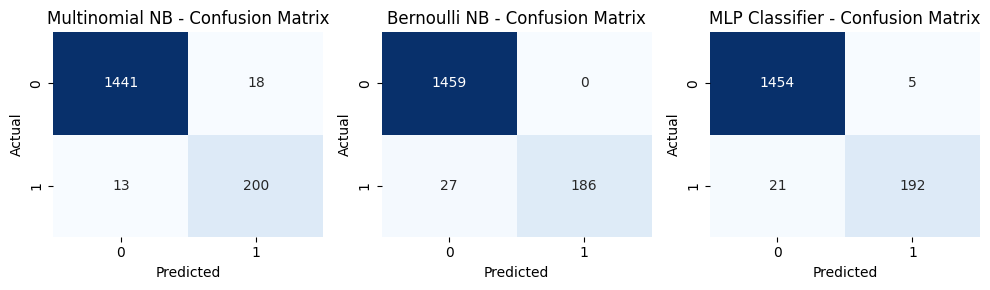

In [ ]:
#Confusion Matrix Subplot for 3 Models
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model),("MLP Classifier", mlp_classifier_model) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Metric Comparison Heatmap </span></b>

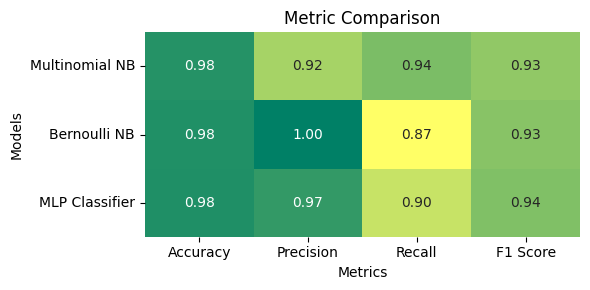

In [ ]:
#Metric Comparison Heatmap
metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">

<h3 align="left"><font color=#fa592d>Conclusion</font></h3>

* All three models perform exceptionally well, with high accuracy scores.
* MLP Classifier leads in accuracy of 99%, followed by Bernoulli NB (98.39%), and Multinomial NB (98.15%)
* Bernoulli NB achieves perfect precision (100%), indicating it has predicated correctly all the time.
* MLP Classifier excels in F1 score of 94%
* MLP Classifier has slightly lower recall 90% but compensates with higher precision.

> **The final choice of model always depend upon what is needed to be filtered & hence model can be adjusted to improve recall or precision.**
> - If you want to  minimize the number of false negatives i.e spam messages don't end up in the user's inbox you would like to have high Recall.
> - On the other hand with high precision(false negatives), one might miss important messages because the model is overly cautious in classifying messages as spam.